In [245]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("StreamingHistory.csv")
df.dropna(inplace = True) #elimina las entradas nulas / sin valor asignado en alguna columna
df = df.loc[df["msPlayed"] > 30000] #elimina los scrobbles de menos de 30 segundos
df = df.reset_index() #reinicia el index
df = df.drop(columns="index") #borra columna que se crea
print(df)

               endTime                       artistName  \
0     2022-05-08 07:06                     Idina Menzel   
1     2022-05-10 16:18                    Dexter Gordon   
2     2022-05-11 15:28  The Cannonball Adderley Quintet   
3     2022-05-11 15:32                  Dizzy Gillespie   
4     2022-05-11 22:02                       Chet Baker   
...                ...                              ...   
5959  2023-05-11 21:48                    Charly García   
5960  2023-05-11 21:51                         Almendra   
5961  2023-05-11 21:55                         Almendra   
5962  2023-05-11 21:58                         Almendra   
5963  2023-05-11 23:54                         Almendra   

                            trackName  msPlayed  
0                       Show Yourself     30215  
1                          Blue bossa    139449  
2              Work Song - Remastered    307626  
3     On The Sunny Side Of The Street    262774  
4                       Autumn Leaves    

In [333]:
masEscuchadosArtistas = df.groupby("artistName")["msPlayed"].sum()
masEscuchadosArtistas = masEscuchadosArtistas.drop("Philosophize This!") #elimina Philosophize This! de los Artistas porque es un podcast
masEscuchadosArtistas = masEscuchadosArtistas.sort_values(ascending = False) #ordena las filas para que los que mas minutos tengan aparezcan primeros

masEscuchadosCanciones = df.groupby("trackName")["msPlayed"].sum()
masEscuchadosCanciones = masEscuchadosCanciones.sort_values(ascending = False) #ordena las filas para que los que mas minutos tengan aparezcan primeros

masEscuchado = list(masEscuchadosArtistas.keys()) #convierte a la variable en una lista con las keys
masEscuchado = str(masEscuchado[0]) #convierte a la variable en el primer valor de la lista
masEscuchadoTema = list(masEscuchadosCanciones.keys()) #convierte a la variable en una lista con las keys

masEscuchadoDelMasEscuchado = df[df["artistName"] == masEscuchado] #se fija los temas registrados bajo el artista más escuchado
masEscuchadoDelMasEscuchado = masEscuchadoDelMasEscuchado.groupby("trackName")["msPlayed"].sum()
masEscuchadoDelMasEscuchado = masEscuchadoDelMasEscuchado.sort_values(ascending = False) #ordena las filas para que los que mas minutos tengan aparezcan primeros
masEscuchadoDelMasEscuchadoTema = list(masEscuchadoDelMasEscuchado.keys()) #asigna el valor de las keys a la variable como una lista
masEscuchadoDelMasEscuchadoTema = masEscuchadoDelMasEscuchadoTema[0] #convierte a la variable al primer valor de la lista

segundoMasEscuchado = list(masEscuchadosArtistas.keys()) #convierte a la variable en una lista con las keys
segundoMasEscuchado = str(segundoMasEscuchado[1]) #convierte a la variable en el segundo valor de la lista
masEscuchadoDelSegundoMasEscuchado = df[df["artistName"] == segundoMasEscuchado] #se fija los temas registrados bajo el segundo artista más escuchado
masEscuchadoDelSegundoMasEscuchado = masEscuchadoDelSegundoMasEscuchado.groupby("trackName")["msPlayed"].sum()
masEscuchadoDelSegundoMasEscuchado = masEscuchadoDelSegundoMasEscuchado.sort_values(ascending = False) #ordena las filas para que los que mas minutos tengan aparezcan primeros
masEscuchadoDelSegundoMasEscuchadoTema = list(masEscuchadoDelSegundoMasEscuchado.keys()) #asigna el valor de las keys a la variable como una lista
masEscuchadoDelSegundoMasEscuchadoTema = masEscuchadoDelSegundoMasEscuchadoTema[0] #convierte a la variable al primer valor de la lista

endTime = pd.to_datetime(df["endTime"]) #crea una variable y asigna y convierte a la columna endTime a formato dateTime

In [331]:
print("1: Los tipos de valores son dateTime para endTime, object para artistName y trackName, y int para msPlayed")

1: Los tipos de valores son dateTime para endTime, object para artistName y trackName, y int para msPlayed


In [334]:
print("2: Las reproducciones son de entre ", endTime.min(), " y ", endTime.max())

2: Las reproducciones son de entre  2022-05-08 07:06:00  y  2023-05-11 23:54:00


In [252]:
n = set(trackName) #elimina los valores repetidos
contadorUnicos = len(n) #cuenta cuantos valores totales hay después de la eliminación
print("3: Se escucharon un total de ", contadorUnicos, " canciones diferentes")

3: Se escucharon un total de  2180  canciones diferentes


In [143]:
msTotal = df["msPlayed"].sum() #suma el total de minutos escuchados
print("4: Se escucharon un total de ", msTotal / 1000 ," segundos")

4: Se escucharon un total de  1308843.206  segundos


In [238]:
print("5: El artista más escuchado es ", masEscuchado, " con ", masEscuchadosArtistas[0] / 1000, " segundos escuchados" )

5: El artista más escuchado es  Charly García  con  38753.802  segundos escuchados


In [191]:
print("6: La canción más escuchada es ", masEscuchadoTema[0], " con ", masEscuchadosCanciones[0] / 1000, "segundos escuchados")

6: La canción más escuchada es  Spain  con  14901.345 segundos escuchados


trackName
Spain    14901345
Name: msPlayed, dtype: int64

In [244]:
print("7: La canción más escuchado del artista más escuchado es ", masEscuchadoDelMasEscuchadoTema, " de ", masEscuchado, " con ", masEscuchadoDelMasEscuchado[0] / 1000, " segundos escuchados")

7: La canción más escuchado del artista más escuchado es  Yo No Quiero Volverme Tan Loco  de  C  con  3520.431  segundos escuchados


In [286]:
print("8: Los 10 artistas más escuchados son ")
masEscuchadosArtistas.head(10)

8: Los 10 artistas más escuchados son 


artistName
Charly García            38753802
Childish Gambino         34156224
Bizarrap                 25145449
Serú Girán               23838500
Red Hot Chili Peppers    23173160
Trueno                   20899760
Chick Corea              20210358
Joe Satriani             18701614
Talking Heads            18492563
NATHY PELUSO             16736891
Name: msPlayed, dtype: int64

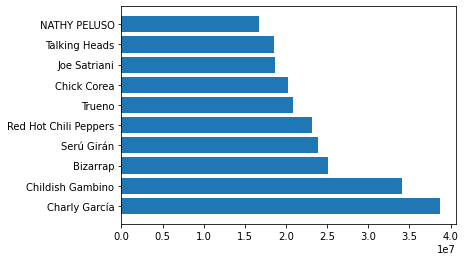

In [300]:
n = masEscuchadosArtistas.keys() #convierte a la variable en una lista con las keys
x = [n[0], n[1], n[2], n[3], n[4], n[5], n[6], n[7], n[8], n[9]] #asigna a los valores que van en el eje x/y teniendo en cuenta que esta en horizontal el grafico
y = [masEscuchadosArtistas[0], masEscuchadosArtistas[1], masEscuchadosArtistas[2], masEscuchadosArtistas[3], masEscuchadosArtistas[4], masEscuchadosArtistas[5], masEscuchadosArtistas[6], masEscuchadosArtistas[7], masEscuchadosArtistas[8], masEscuchadosArtistas[9],]
#asigna a los valores que van en el eje y/x teniendo en cuenta que esta en horizontal el grafico

plt.barh(x,y) #crea el gráfico de barras horizontales
plt.show() #hace que se muestre sólo el gráfico y no información adicional

In [ ]:
print("9: Las 10 canciones más escuchadas son ")
masEscuchadosCanciones.head(10)

9: Las 10 canciones más escuchadas son 


trackName
Spain                                                         14901345
Rain                                                          13200987
Rubina                                                        12087379
Virtual Insanity - Remastered                                  9673909
Autumn Leaves                                                  9623104
VIVIR ASÍ ES MORIR DE AMOR                                     8413852
BUENOS AIRES                                                   8218739
Li'l Darlin' - Live At The Tropicana Hotel, Las Vegas/1969     7952272
The Maze                                                       7757900
Sin Culpa (feat.DrefQuila)                                     7512604
Name: msPlayed, dtype: int64

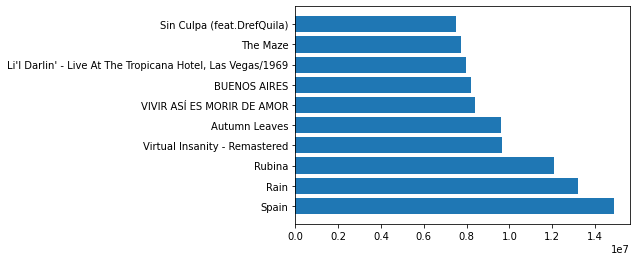

In [302]:
j = masEscuchadosCanciones.keys() #convierte a la variable en una lista con las keys
x = [j[0], j[1], j[2], j[3], j[4], j[5], j[6], j[7], j[8], j[9]] #asigna a los valores que van en el eje x/y teniendo en cuenta que esta en horizontal el grafico
y = [masEscuchadosCanciones[0], masEscuchadosCanciones[1], masEscuchadosCanciones[2], masEscuchadosCanciones[3], masEscuchadosCanciones[4], masEscuchadosCanciones[5], masEscuchadosCanciones[6], masEscuchadosCanciones[7], masEscuchadosCanciones[8], masEscuchadosCanciones[9]]
#asigna a los valores que van en el eje y/x teniendo en cuenta que esta en horizontal el grafico

plt.barh(x, y) #crea el gráfico de barras horizontales
plt.show() #hace que se muestre sólo el gráfico y no información adicional

In [251]:
print("10: Las 10 canciones más escuchadas de el artista más escuchado son ")
masEscuchadoDelMasEscuchado.head(10)

10: Las 10 canciones más escuchadas de el artista más escuchado son 


trackName
Yo No Quiero Volverme Tan Loco    3520431
Hablando a Tu Corazón             3448863
Yendo De La Cama Al Living        3066536
Raros Peinados Nuevos             2622853
Cerca De La Revolucion            2504346
Nos Siguen Pegando Abajo          2497165
Ojos De Video Tape                2183211
Promesas Sobre El Bidet           1875831
Demoliendo Hoteles                1765862
Tu Amor                           1677168
Name: msPlayed, dtype: int64

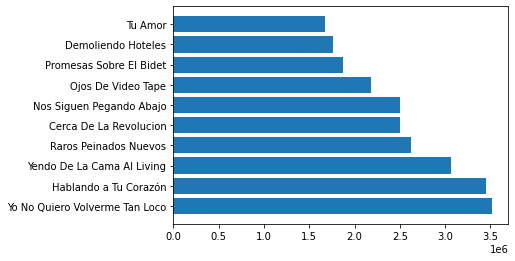

In [306]:
i = masEscuchadoDelMasEscuchado.keys() #convierte a la variable en una lista con las keys
x = [i[0], i[1], i[2], i[3], i[4], i[5], i[6], i[7], i[8], i[9]] #asigna a los valores que van en el eje x/y teniendo en cuenta que esta en horizontal el grafico
y = [masEscuchadoDelMasEscuchado[0], masEscuchadoDelMasEscuchado[1], masEscuchadoDelMasEscuchado[2], masEscuchadoDelMasEscuchado[3], masEscuchadoDelMasEscuchado[4], masEscuchadoDelMasEscuchado[5], masEscuchadoDelMasEscuchado[6], masEscuchadoDelMasEscuchado[7], masEscuchadoDelMasEscuchado[8], masEscuchadoDelMasEscuchado[9]] 
#asigna a los valores que van en el eje y/x teniendo en cuenta que esta en horizontal el grafico

plt.barh(x, y) #crea el gráfico de barras horizontales
plt.show() #hace que se muestre sólo el gráfico y no información adicional

In [321]:
print("11: La canción más escuchado del segundo artista más escuchado es ", masEscuchadoDelSegundoMasEscuchadoTema, " de ", segundoMasEscuchado, " con ", masEscuchadoDelSegundoMasEscuchado[0] / 1000, " segundos escuchados")

11: La canción más escuchado del segundo artista más escuchado es  Redbone  de  Childish Gambino  con  5112.705  segundos escuchados


In [322]:
print("12: Las 10 canciones más escuchadas del segundo artista más escuchado son ")
masEscuchadoDelSegundoMasEscuchado.head(10)

12: Las 10 canciones más escuchadas del segundo artista más escuchado son 


trackName
Redbone                                     5112705
This Is America                             4241418
Feels Like Summer                           3538624
III. Telegraph Ave. ("Oakland" by Lloyd)    3101639
3005                                        3046373
Sober                                       3020127
Me and Your Mama                            2895018
Baby Boy                                    2788257
California                                  1817926
Les                                         1167636
Name: msPlayed, dtype: int64

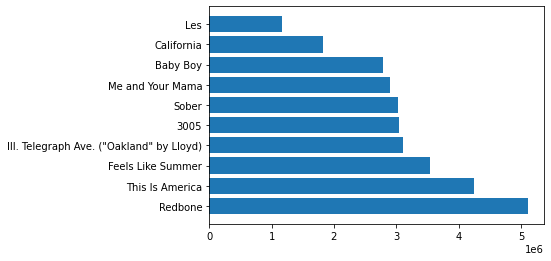

In [323]:
k = masEscuchadoDelSegundoMasEscuchado.keys() #convierte a la variable en una lista con las keys
x = [k[0], k[1], k[2], k[3], k[4], k[5], k[6], k[7], k[8], k[9]] #asigna a los valores que van en el eje x/y teniendo en cuenta que esta en horizontal el grafico
y = [masEscuchadoDelSegundoMasEscuchado[0], masEscuchadoDelSegundoMasEscuchado[1], masEscuchadoDelSegundoMasEscuchado[2], masEscuchadoDelSegundoMasEscuchado[3], masEscuchadoDelSegundoMasEscuchado[4], masEscuchadoDelSegundoMasEscuchado[5], masEscuchadoDelSegundoMasEscuchado[6], masEscuchadoDelSegundoMasEscuchado[7], masEscuchadoDelSegundoMasEscuchado[8], masEscuchadoDelSegundoMasEscuchado[9]]
#asigna a los valores que van en el eje y/x teniendo en cuenta que esta en horizontal el grafico

plt.barh(x, y) #crea el gráfico de barras horizontales
plt.show() #hace que se muestre sólo el gráfico y no información adicional